# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


## Load the Data

In [451]:
df=pd.read_csv("C:\Traffic_Accidents.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [452]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [453]:
df.shape

(52000, 26)

In [454]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [456]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51995    False
51996    False
51997    False
51998    False
51999    False
Length: 52000, dtype: bool

In [457]:
check_null = df.isnull().any(axis=1)
null = df[check_null]
print(null)



       Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
11                  396890.0                297700.0  -2.047337  52.577079   
12                  380015.0                359660.0  -2.300176  53.133704   
22                  433010.0                419580.0  -1.501818  53.671651   
28                  508910.0                307940.0  -0.391241  52.658226   
79                  435770.0                282870.0  -1.475191  52.442601   
...                      ...                     ...        ...        ...   
51888               257500.0                207160.0  -4.065522  51.744926   
51900               378460.0                402510.0  -2.326344  53.518809   
51918               358680.0                388130.0  -2.622760  53.388373   
51932               530730.0                174500.0  -0.119856  51.454341   
51989               436450.0                147950.0  -1.479368  51.229524   

       Police_Force  Accident_Severity  Number_of_Vehicles  \
1

In [458]:
df = df.drop('Date', axis=1)
df = df.drop('Year', axis=1)
df = df.drop('Light_Conditions', axis=1)
df = df.drop('Local_Authority_(Highway)', axis=1)
df = df.drop('Accident_Severity', axis=1)

In [459]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(0).astype(int)
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(0).astype(int)
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(0).astype(int)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [460]:
import numpy as np

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



<AxesSubplot:xlabel='Number_of_Casualties'>

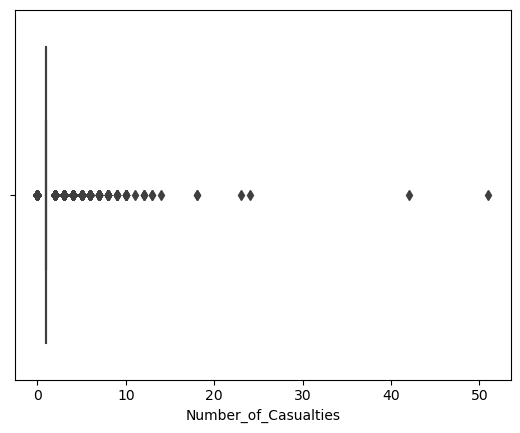

In [461]:
import seaborn  as sns
import numpy as np

sns.boxplot(x=df['Number_of_Casualties'])

<AxesSubplot:xlabel='Urban_or_Rural_Area'>

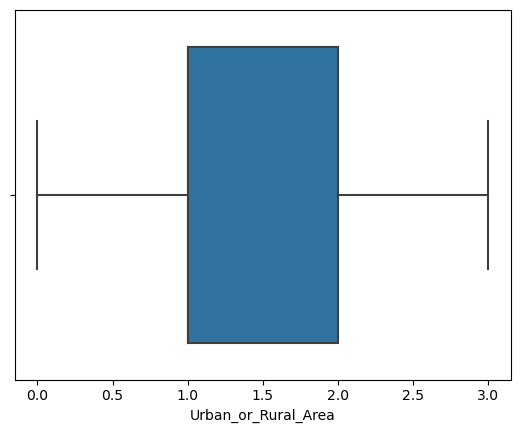

In [462]:
import seaborn  as sns
import numpy as np

sns.boxplot(x=df['Urban_or_Rural_Area'])

In [463]:
df['Number_of_Casualties'] = df['Number_of_Casualties'].fillna(0).astype(int)
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(0).astype(int)

In [464]:
Nan = df.dropna()

In [465]:
df=remove_outliers(df,'Police_Force')
df=remove_outliers(df,'Location_Easting_OSGR')
df=remove_outliers(df,'Urban_or_Rural_Area')
df=remove_outliers(df,'2nd_Road_Number')
df=remove_outliers(df,'2nd_Road_Class')
df=remove_outliers(df,'Speed_limit')
df=remove_outliers(df,'Local_Authority_(District)')

In [466]:
df = pd.get_dummies(df,columns=['Road_Surface_Conditions'])
df = pd.get_dummies(df,columns=['Weather_Conditions'])
df = pd.get_dummies(df,columns=['Pedestrian_Crossing-Physical_Facilities'])
df = pd.get_dummies(df,columns=['Road_Type'])
df = pd.get_dummies(df,columns=['Pedestrian_Crossing-Human_Control'])
df = pd.get_dummies(df,columns=['Did_Police_Officer_Attend_Scene_of_Accident'])

In [467]:
X = df
X_mean = X.mean()

X_std = X.std()

Z = (X - X_mean) / X_std

c = Z.cov()

In [468]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [469]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[['Longitude', 'Latitude']])


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [470]:
#Speed_limet and Location_Easting_OSGR
pca2 = PCA(n_components=2)
X_pca = pca.fit_transform(df[['Location_Northing_OSGR', 'Location_Easting_OSGR']])


In [471]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown,Pedestrian_Crossing-Human_Control_Control by other authorised person,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_Yes
0,560530.0,103950.0,0.277298,50.812789,47,1,1,6,556,3,...,0,0,0,0,0,0,0,1,0,1
1,508860.0,187170.0,-0.430574,51.572846,1,2,1,1,26,4,...,0,0,1,0,0,0,0,1,0,1
3,341700.0,408330.0,-2.881800,53.568318,4,1,2,7,84,6,...,1,0,0,0,0,0,0,1,0,1
4,386488.0,350090.0,-2.203020,53.047882,21,2,2,3,257,6,...,0,0,1,0,0,0,0,1,0,1
10,508230.0,429880.0,-0.359973,53.754047,16,1,1,5,228,6,...,0,0,1,0,0,0,0,1,0,1


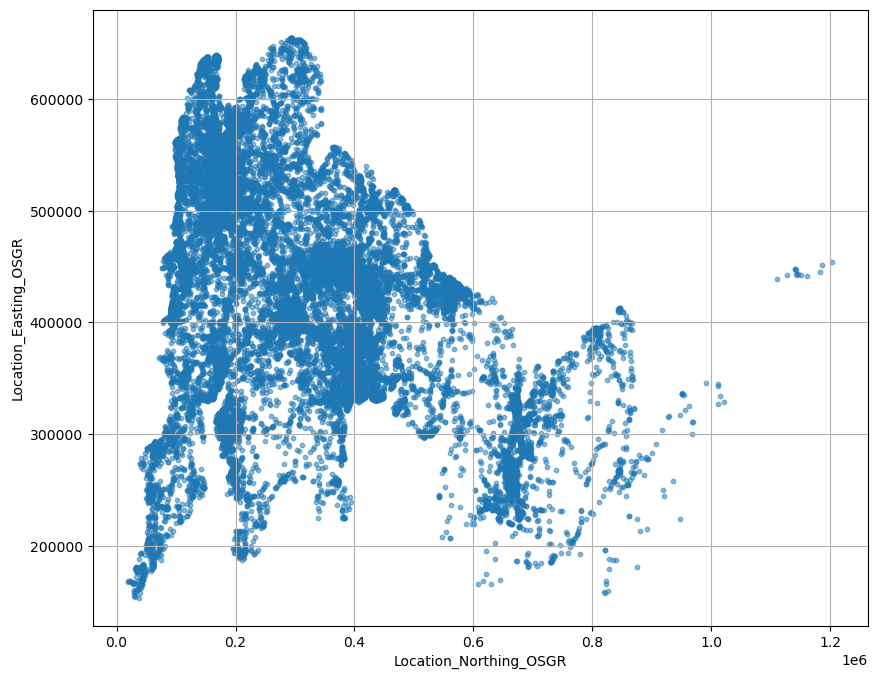

In [472]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Location_Northing_OSGR'], df['Location_Easting_OSGR'], s=10, alpha=0.5)
plt.xlabel('Location_Northing_OSGR')
plt.ylabel('Location_Easting_OSGR')
plt.grid(True)
plt.show()

In [473]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

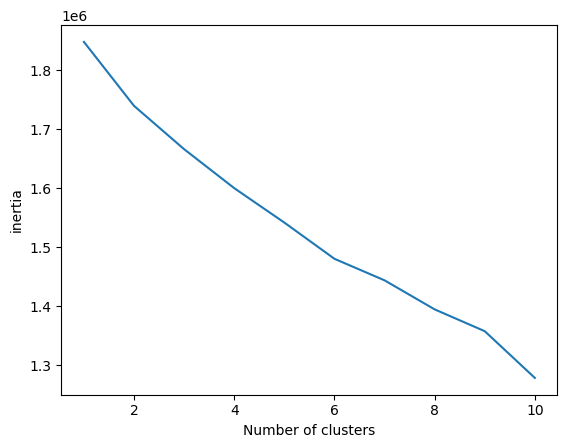

In [474]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('inertia') 
plt.show()

In [482]:
n_clusters = 7  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(df[['Location_Northing_OSGR', 'Location_Easting_OSGR']])

silhouette_avg = silhouette_score(df[['Location_Northing_OSGR', 'Latitude']], labels)
print(f"The Silhouette Coefficient is: {silhouette_avg:.2f}")

The Silhouette Coefficient is: 0.34


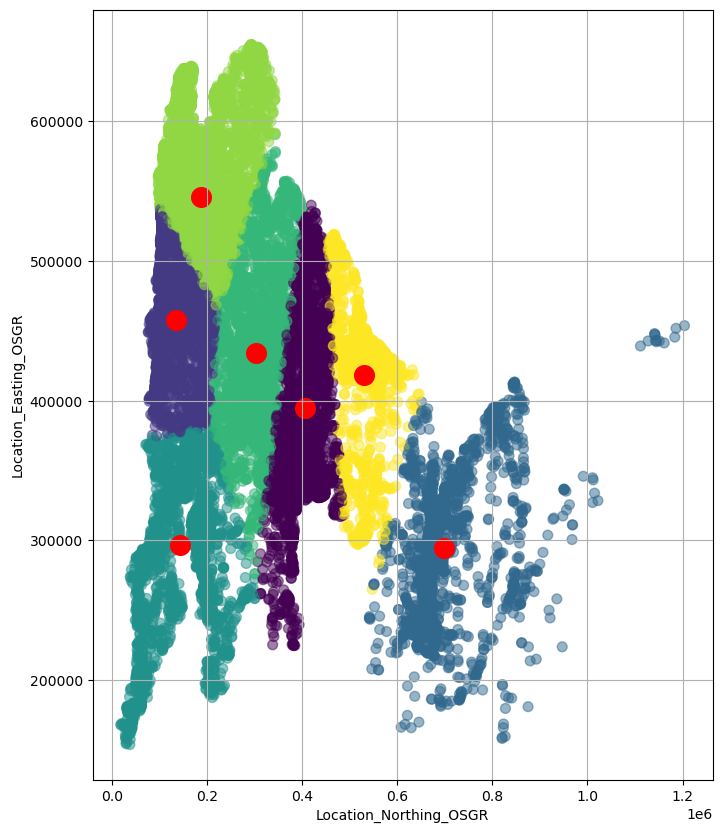

In [483]:

plt.figure(figsize=(8, 10))
plt.scatter(df['Location_Northing_OSGR'], df['Location_Easting_OSGR'], c=labels, s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='o')
plt.xlabel('Location_Northing_OSGR')
plt.ylabel('Location_Easting_OSGR')
plt.grid(True)
plt.show()

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

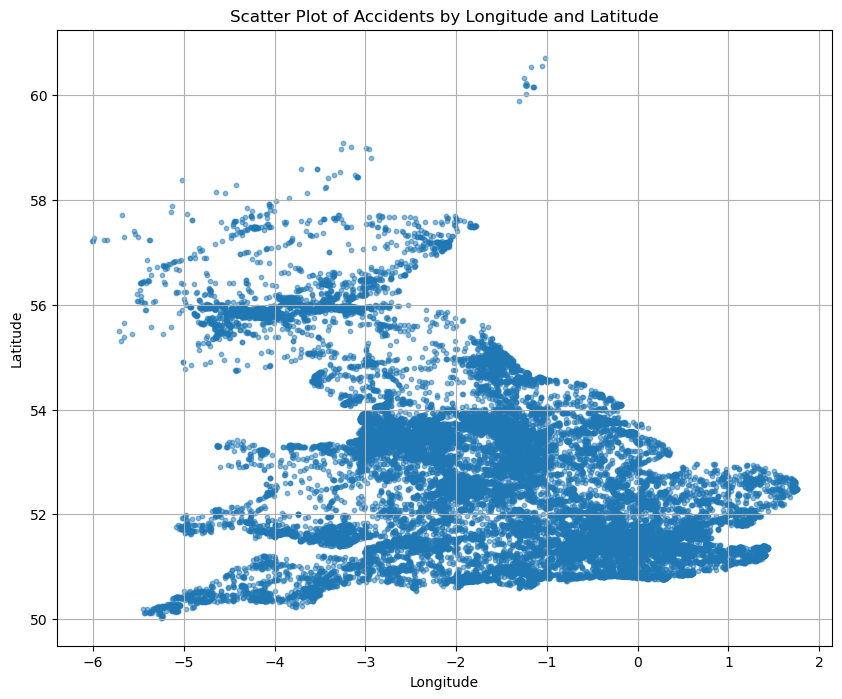

In [477]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=10, alpha=0.5)
plt.title('Scatter Plot of Accidents by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [478]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

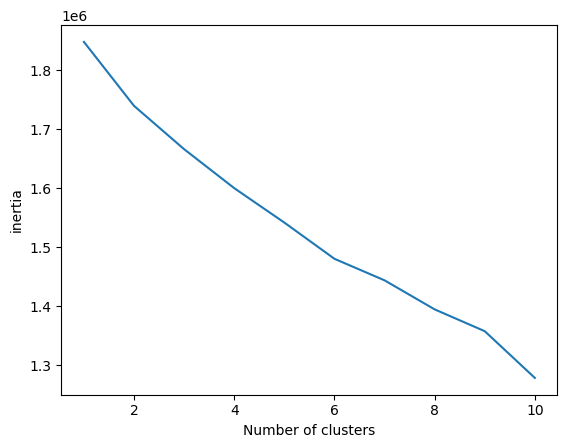

In [479]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('inertia') 
plt.show()

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [480]:
n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(df[['Longitude', 'Latitude']])

silhouette_avg = silhouette_score(df[['Longitude', 'Latitude']], labels)
print(f"The Silhouette Coefficient is: {silhouette_avg:.2f}")

The Silhouette Coefficient is: 0.47


## Plot the data points with their predicted cluster center

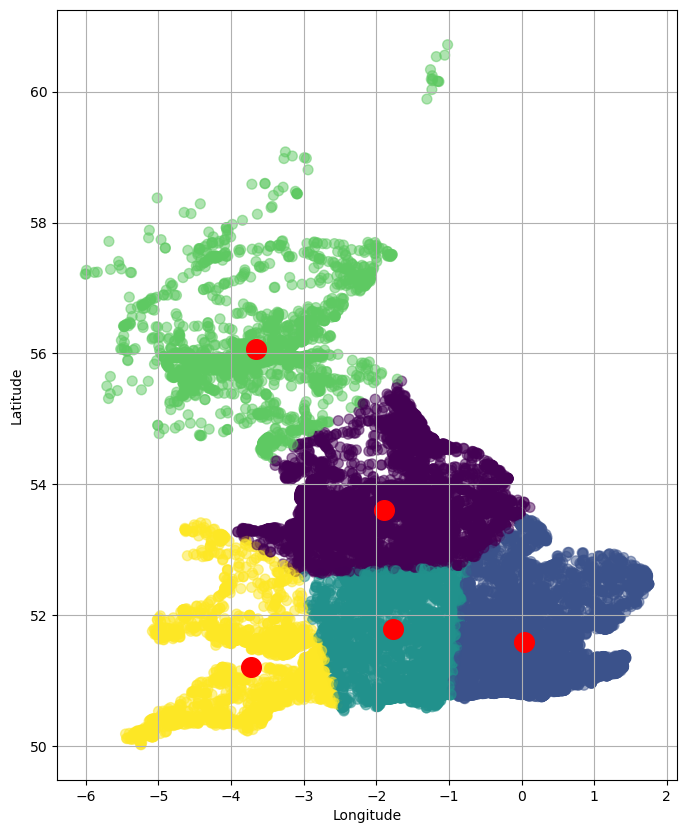

In [481]:

plt.figure(figsize=(8, 10))
plt.scatter(df['Longitude'], df['Latitude'], c=labels, s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

#Which features did you choose for clustering and why?
#i chooseLocation_Northing_OSGR , Location_Easting_OSGR And Longitude , Latitude
#beacuse i see good relationship and have clustering 

#How did you determine the optimal number?
##5 for fisrt and 7 beacse i use the figure to give me number the cluster

#Evaluation:
#determaine the  nearst and far the group and accurecy

#Improvements and Recommendations:
#maybe i choose anther cluster like DBSCAN